In [1]:
import pandas as pd
import numpy as np
import warnings, random
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

In [2]:
# !pip install catboost 
# !pip install category_encoders

In [3]:
train=pd.read_csv('train2.csv')
test=pd.read_csv('test2.csv')

In [4]:
train.head()

,Unnamed: 0,id,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group,income_avg
0,0,F138994709202500,F,N,N,0,202500.0,Commercial associate,Higher education,Married,...,0,NaN,2.0,6.0,1.0,39,30,12,10~20,101250.0
1,1,F113801540247500,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,1,Laborers,3.0,5.0,1.0,32,30,4,1~5,82500.0
2,2,M190874434450000,M,Y,Y,0,450000.0,Working,Higher education,Married,...,0,Managers,2.0,22.0,2.0,53,50,12,10~20,225000.0
3,3,F150882092202500,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,0,Sales staff,2.0,37.0,0.0,42,40,5,5~10,101250.0
4,4,F150372105157500,F,Y,Y,0,157500.0,State servant,Higher education,Married,...,0,Managers,2.0,26.0,2.0,42,40,5,5~10,78750.0


In [5]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)
train.head()

,id,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group,income_avg
0,F138994709202500,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,0,NaN,2.0,6.0,1.0,39,30,12,10~20,101250.0
1,F113801540247500,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,1,Laborers,3.0,5.0,1.0,32,30,4,1~5,82500.0
2,M190874434450000,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,0,Managers,2.0,22.0,2.0,53,50,12,10~20,225000.0
3,F150882092202500,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,Sales staff,2.0,37.0,0.0,42,40,5,5~10,101250.0
4,F150372105157500,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,0,Managers,2.0,26.0,2.0,42,40,5,5~10,78750.0


In [6]:
test.drop(['Unnamed: 0'],axis=1,inplace=True)
test.head()

,id,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,phone,email,occyp_type,family_size,begin_month,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group,income_avg
0,M219900112500,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,1,0,No work experience,2.0,60.0,61,60,No work experience,No work experience,56250.0
1,F189648671135000,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,...,1,0,Core staff,2.0,36.0,52,50,23,20~30,67500.0
2,F1588721769372,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,Laborers,2.0,40.0,44,40,0,~1,34686.0
3,M192702531112500,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,Drivers,2.0,41.0,53,50,6,5~10,56250.0
4,F178229385225000,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,...,0,0,Managers,2.0,8.0,49,40,25,20~30,112500.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24809 entries, 0 to 24808
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              24809 non-null  object 
 1   gender          24809 non-null  object 
 2   car             24809 non-null  object 
 3   reality         24809 non-null  object 
 4   child_num       24809 non-null  int64  
 5   income_total    24809 non-null  float64
 6   income_type     24809 non-null  object 
 7   edu_type        24809 non-null  object 
 8   family_type     24809 non-null  object 
 9   house_type      24809 non-null  object 
 10  work_phone      24809 non-null  int64  
 11  phone           24809 non-null  int64  
 12  email           24809 non-null  int64  
 13  occyp_type      21363 non-null  object 
 14  family_size     24809 non-null  float64
 15  begin_month     24809 non-null  float64
 16  credit          24809 non-null  float64
 17  YEARS_BIRTH     24809 non-null 

In [8]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  10
Number of Categorical features:  11


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9648 non-null   object 
 1   gender          9648 non-null   object 
 2   car             9648 non-null   object 
 3   reality         9648 non-null   object 
 4   child_num       9648 non-null   int64  
 5   income_total    9648 non-null   float64
 6   income_type     9648 non-null   object 
 7   edu_type        9648 non-null   object 
 8   family_type     9648 non-null   object 
 9   house_type      9648 non-null   object 
 10  work_phone      9648 non-null   int64  
 11  phone           9648 non-null   int64  
 12  email           9648 non-null   int64  
 13  occyp_type      8244 non-null   object 
 14  family_size     9648 non-null   float64
 15  begin_month     9648 non-null   float64
 16  YEARS_BIRTH     9648 non-null   int64  
 17  Age_group       9648 non-null   i

In [10]:
numerical_feats

['child_num',
 'income_total',
 'work_phone',
 'phone',
 'email',
 'family_size',
 'begin_month',
 'YEARS_BIRTH',
 'Age_group',
 'income_avg']

In [11]:
categorical_feats

['id',
 'gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type',
 'YEARS_EMPLOYED',
 'EMPLOYED_group']

In [12]:
for df in [train,test]:
    df['income_total'] = np.log1p(1+df['income_total'])

In [13]:
encoder = OrdinalEncoder(categorical_feats)
train[categorical_feats] = encoder.fit_transform(train[categorical_feats], train['credit'])
test[categorical_feats] = encoder.transform(test[categorical_feats])

train['id'] = train['id'].astype('int64')
test['id'] = test['id'].astype('int64')

In [14]:
kmeans_train = train.drop(['credit'], axis=1)
kmeans = KMeans(n_clusters=36, random_state=42).fit(kmeans_train)
train['cluster'] = kmeans.predict(kmeans_train)
test['cluster'] = kmeans.predict(test)

In [15]:
numerical_feats.remove('income_total')
scaler = StandardScaler()
train[numerical_feats] = scaler.fit_transform(train[numerical_feats])
test[numerical_feats] = scaler.transform(test[numerical_feats])

In [16]:
seed = 42
#n_fold_list = list(range(7,16,1))
n_fold_list = [14]
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]
X_test = test

In [17]:
for n_fold in n_fold_list:
    print('***',n_fold,'***')

    skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
    folds=[]
    for train_idx, valid_idx in skfold.split(X, y):
            folds.append((train_idx, valid_idx))

    cat_pred = np.zeros((X.shape[0], n_class))
    cat_pred_test = np.zeros((X_test.shape[0], n_class))
    cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'id']
    for fold in range(n_fold):
        print(f'\n----------------- Fold {fold} -----------------\n')
        train_idx, valid_idx = folds[fold]
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
        train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
        valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

        model_cat = CatBoostClassifier()
        model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)

        cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
        cat_pred_test += model_cat.predict_proba(X_test) / n_fold
        print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
        
    print(f'\t********Log Loss: {log_loss(y, cat_pred):.6f}********\n\n\n\n')

*** 14 ***

----------------- Fold 0 -----------------

Learning rate set to 0.114968
0:	learn: 1.0368631	test: 1.0359247	best: 1.0359247 (0)	total: 75.3ms	remaining: 1m 15s
100:	learn: 0.7272401	test: 0.6887682	best: 0.6886401 (99)	total: 2.46s	remaining: 21.9s
200:	learn: 0.7101705	test: 0.6861659	best: 0.6856436 (158)	total: 4.99s	remaining: 19.8s
300:	learn: 0.6933588	test: 0.6851942	best: 0.6847596 (258)	total: 7.41s	remaining: 17.2s
400:	learn: 0.6759976	test: 0.6846695	best: 0.6846470 (331)	total: 10.5s	remaining: 15.8s
500:	learn: 0.6604600	test: 0.6852562	best: 0.6840776 (472)	total: 13.7s	remaining: 13.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6840776374
bestIteration = 472

Shrink model to first 473 iterations.
CV Log Loss Score: 0.684078

----------------- Fold 1 -----------------

Learning rate set to 0.114968
0:	learn: 1.0358783	test: 1.0363930	best: 1.0363930 (0)	total: 37.1ms	remaining: 37.1s
100:	learn: 0.7274940	test: 0.6923669	best: 0.69

In [18]:
#best kfold=14

In [19]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

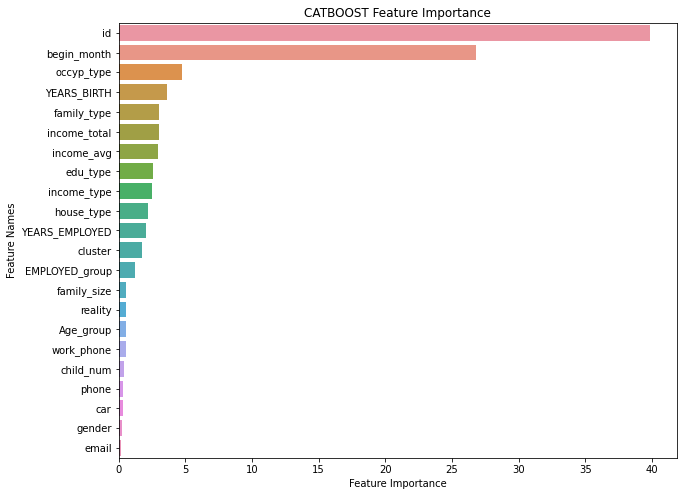

In [20]:
plot_feature_importance(model_cat.get_feature_importance(),X_test.columns,'CATBOOST')